In [1]:
## MINERIA DE DATOS 
##Carrera: Big Data
##Estudiante: Jonnathan Astudillo
##Fecha:26/04/2024

In [2]:
pip install mysql.connector

In [3]:
!pip install xlrd

In [8]:
import mysql.connector
import pandas as pd


In [9]:
!pip install pymysql

In [14]:
# Especifica la ruta de tu archivo Excel
ruta_archivo_excel = "Datos_nulos.xlsx"

# Lee el archivo Excel y conviértelo a un DataFrame
df = pd.read_excel(ruta_archivo_excel)

# Muestra las primeras filas del DataFrame
df.head()


,Unnamed: 0,Nombre,Edad,Puntuacion,Sexo
0,0,Anthony Wallace,46,86,M
1,1,Steven Barker,25,67,F
2,2,Barry Graham,56,82,M
3,3,Austin Jackson,40,92,M
4,6,Zachary Sampson,20,85,M


In [15]:
### 3. Proceso de extracción y Carga de Datos

In [17]:
#3.1. Conexión a la base de datos

In [19]:
#Método para conectar a la base de datos
def establecer_conexion(host, user, password, database):
    try:
        conexion = mysql.connector.connect(
            host="localhost",
            user="root",
            password="",
            database="testudiantes"
        )
        return conexion
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

In [21]:
conexion = establecer_conexion("localhost", "root", "", "testudiantes")
#Comprobación de la conexión
conexion.is_connected()

True

In [22]:
### 3.2. Eliminar los datos de la base de datos

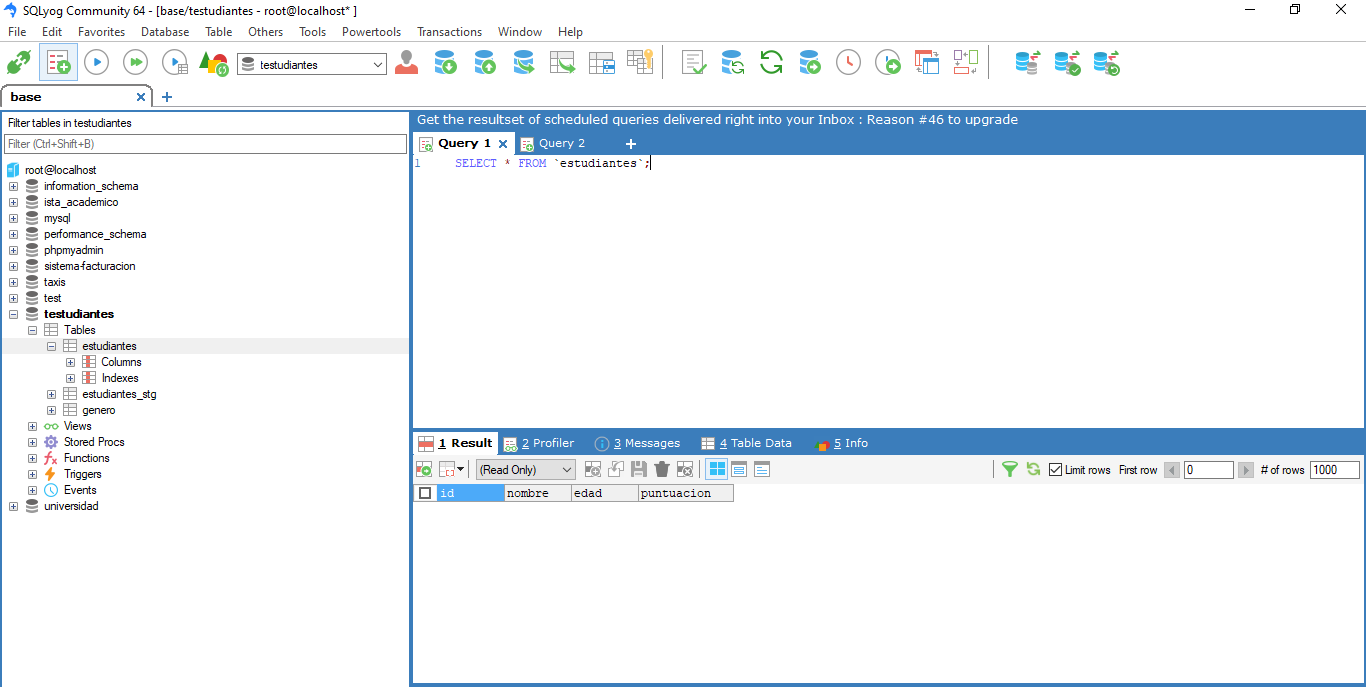

In [23]:
from IPython.display import Image
Image(filename='Ca01.PNG')

In [25]:
def eliminar_datos_base(conexion):
    try:
        # Desactivar las restricciones de clave externa para permitir la eliminación
        cursor = conexion.cursor()
        cursor.execute("SET FOREIGN_KEY_CHECKS=0;")

        # Eliminar datos de las tablas
        delete_queries = [
            'DELETE FROM estudiantes;',
            'DELETE FROM estudiantes_stg;',
            'DELETE FROM genero;'
        ]

        for query in delete_queries:
            cursor.execute(query)

        # Reiniciar los contadores de autoincremento
        reset_auto_increment_queries = [
            'ALTER TABLE estudiantes AUTO_INCREMENT = 1;',
            'ALTER TABLE estudiantes_stg AUTO_INCREMENT = 1;',
            'ALTER TABLE genero AUTO_INCREMENT = 1;'
            
        ]

        for query in reset_auto_increment_queries:
            cursor.execute(query)

        # Confirmar los cambios
        conexion.commit()

        print("Base de datos limpiada exitosamente.")

    except Exception as e:
        print(f"Error al limpiar la base de datos: {e}")

    finally:
        # Reactivar las restricciones de clave externa
        cursor.execute("SET FOREIGN_KEY_CHECKS=1;")
        cursor.close()


In [26]:
eliminar_datos_base(conexion)

Base de datos limpiada exitosamente.


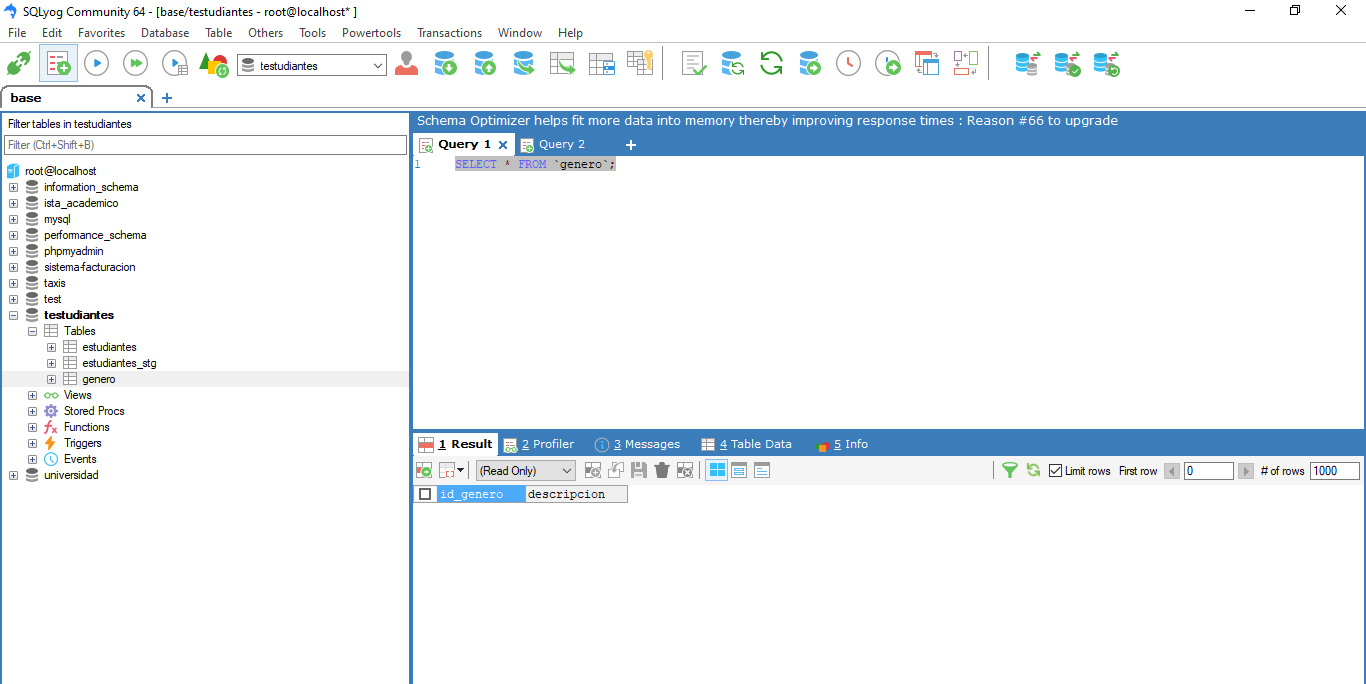

In [27]:
from IPython.display import Image
Image(filename='Ca02.PNG')

In [29]:
### 3.3. Insertar datos a la tabla estudiantes


In [47]:
def insert_estudiantes_stg(conexion, df):
    cursor = conexion.cursor()

    insert_query = "INSERT INTO estudiantes_stg(nombre,edad,puntuacion,genero) VALUES (%s, %s, %s, %s)"

    try:
        for index, row in df.iterrows():
            testudiantes_data = (row['nombre'], row['edad'], row['puntuacion'], row['genero'])
            cursor.execute(insert_query, testudiantes_data)

        conexion.commit()
        print(f"Datos insertados correctamente")

    except Exception as e:
        print(f"Error al insertar datos: {e}")

    finally:
        cursor.close()

In [48]:
insert_estudiantes_stg(conexion, df)

Error al insertar datos: 'nombre'


In [ ]:
from IPython.display import Image
Image(filename='Ca1.PNG')

In [49]:
### 3.4. Limpiar datos innecesarios

In [50]:
ef limpiar_datos_estudiantes_stg(conexion):
    try:
        # Desactivar las restricciones de clave externa para permitir la eliminación
        cursor = conexion.cursor()
        cursor.execute("SET FOREIGN_KEY_CHECKS=0;")

        # Eliminar datos de las tablas
        delete_queries = [
            'delete from estudiantes_stg where generolike"%genero%no%registrad0%";',
            'delete from estudiantes_stg where puntuacion like"%puntuacion%no%registrada%";',
            'delete from estudiantes_stg where edad="Noid"'        
        ]

        for query in delete_queries:
            cursor.execute(query)

        # Confirmar los cambios
        conexion.commit()

        print("Datos tabla estudiantes stg limpiada exitosamente.")

    except Exception as e:
        print(f"Error al limpiar la base de datos: {e}")

    finally:
        # Reactivar las restricciones de clave externa
        cursor.execute("SET FOREIGN_KEY_CHECKS=1;")
        cursor.close()

SyntaxError: invalid syntax (3215987392.py, line 1)

In [ ]:
from IPython.display import Image
Image(filename='Ca2.PNG')